In [0]:
# Image Classification

In [1]:
pip install keras

In [3]:
# load the data
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [4]:
# print datatypes
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [5]:
# get shape
# x: rows, 32x32 pixel images, depth (rgb)
# y: rows, col
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [6]:
# first image (index 0) in train set 
# array: rgb pixels
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

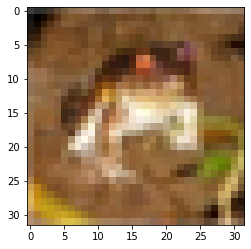

In [7]:
# image as picture
import matplotlib.pyplot as plt
img = plt.imshow(x_train[0])
# 32x32 pixel image of frog

In [8]:
# print label of image
print('Label is:', y_train[0])
# 0-9 values
# 0 airplane, 1 automobile, 2 bird, 3 cat, 4 deer, 5 dog, 6 frog, 7 horse, 8 ship, 9 truck

Label is: [6]


In [9]:
# one-hot encoding: convert labels into set of 10 numbers to input into NN
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# print new labels in train set
print(y_train_one_hot)
# 10 digits per row

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [10]:
# example of new labels
print('The one hot label is:', y_train_one_hot[0])
# label 6 before so corresponds to label number

The one hot label is: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [0]:
# normalize pixels in images to values between 0 and 1
x_train = x_train/255
x_test = x_test/255

In [0]:
# build CNN
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# create architecture
model = Sequential()

# convolution layer
model.add(Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)))
# number of channels, (rows,cols)

# maxpooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# gets max element from features of previous layer, 2x2 filter

model.add(Conv2D(32, (5,5), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

# flatten layer
model.add(Flatten())
# linear array

model.add(Dense(1000, activation='relu')) #rectifier linear unit
# 1000 neurons
model.add(Dense(10, activation='softmax'))

In [0]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# loss for classes more than 2, we have 10

In [15]:
# train model (fit)
hist = model.fit(x_train, y_train_one_hot, batch_size=256, epochs=10, validation_split=0.3)
# 250 training examples, 10 iterations forward backward, 0.3 train test split

Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 47s 1ms/step - loss: 1.6670 - accuracy: 0.3988 - val_loss: 1.4757 - val_accuracy: 0.4669
Epoch 2/10
35000/35000 [==============================] - 46s 1ms/step - loss: 1.3495 - accuracy: 0.5199 - val_loss: 1.2805 - val_accuracy: 0.5470
Epoch 3/10
35000/35000 [==============================] - 46s 1ms/step - loss: 1.1900 - accuracy: 0.5809 - val_loss: 1.1774 - val_accuracy: 0.5914
Epoch 4/10
35000/35000 [==============================] - 46s 1ms/step - loss: 1.1024 - accuracy: 0.6137 - val_loss: 1.1291 - val_accuracy: 0.6073
Epoch 5/10
35000/35000 [==============================] - 47s 1ms/step - loss: 1.0157 - accuracy: 0.6425 - val_loss: 1.1475 - val_accuracy: 0.6056
Epoch 6/10
35000/35000 [==============================] - 46s 1ms/step - loss: 0.9268 - accuracy: 0.6778 - val_loss: 1.1045 - val_accuracy: 0.6186
Epoch 7/10
35000/35000 [==============================] - 46s 1ms/st

In [16]:
# model accuracy
model.evaluate(x_test, y_test_one_hot)[1]

10000/10000 [==============================] - 5s 450us/step


0.6557000279426575

In [17]:
# visualize model accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

KeyError: ignored

In [0]:
# visualize model loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [19]:
# load data
from google.colab import files
uploaded = files.upload()
my_image = plt.imread('cat.4014.jpg')

Saving cat.4014.jpg to cat.4014.jpg


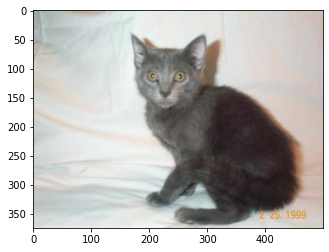

In [20]:
# show uploaded image
img = plt.imshow(my_image)

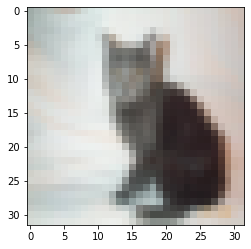

In [21]:
# resize image
from skimage.transform import resize
my_image_resized = resize(my_image, (32,32,3))
img = plt.imshow(my_image_resized)

In [22]:
# get probabilities for each class
import numpy as np
probabilities = model.predict(np.array([my_image_resized,]))

# print probabilities
print(probabilities)

[[2.78229895e-03 1.17135853e-04 6.02284707e-02 8.29753101e-01
  2.12163795e-02 2.08338350e-02 1.55381125e-03 2.73077711e-02
  1.08532235e-02 2.53540389e-02]]


In [24]:
number_to_class = ['airplane', 'automibile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0,:])
# lowest at 0, highest at 9
print('Most likely class:', number_to_class[index[9]], '--probability:', probabilities[0, index[9]])
print('Second most likely class:', number_to_class[index[8]], '--probability:', probabilities[0, index[8]])
print('Third most likely class:', number_to_class[index[7]], '--probability:', probabilities[0, index[7]])
print('Fourth most likely class:', number_to_class[index[6]], '--probability:', probabilities[0, index[6]])
print('Fifth most likely class:', number_to_class[index[5]], '--probability:', probabilities[0, index[5]])

Most likely class: cat --probability: 0.8297531
Second most likely class: bird --probability: 0.06022847
Third most likely class: horse --probability: 0.027307771
Fourth most likely class: truck --probability: 0.025354039
Fifth most likely class: deer --probability: 0.02121638


In [0]:
# save model
model.save('cnn_animal_model.h5')    

In [0]:
from keras.models import load_model
model = load_model('cnn_animal_model.h5')